Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.7769031470325262 -4.632004788302857 0.1576985650786045


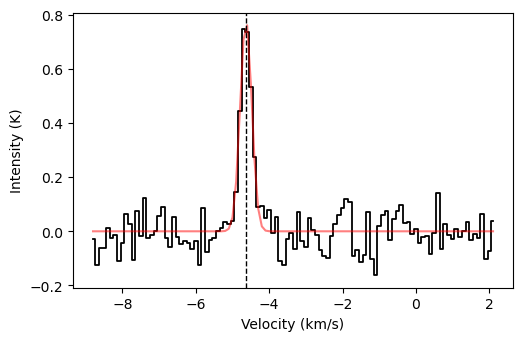

In [26]:
from astropy.modeling.models import Gaussian1D
import matplotlib.pyplot as plt
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.io import fits
import numpy as np

c13 = fits.getdata('/Users/xelle/Downloads/PolS_C18O_all_c30_v10_fullcube_vcut.fits')
v13 = np.arange(-8.8, 2.2, 0.1)

px = [140.95088806, 128.50305051, 125.44240833, 110.7130185, 109.25533973]
py = [55.38178547, 50.23857511, 42.03487215, 42.55337539, 46.74839184]

nra = round(px[4])
ndec = round(py[4])

fig = plt.figure(figsize=(8.8, 5.5))
ax = plt.axes([.09, .09, 0.5, 0.5])
ax.plot(v13[:], c13[:, ndec, nra], drawstyle='steps-mid', linewidth=1.3, color = 'k')
ax.grid(False) #False : grid 지우기. True라고 하면 그리드 그려짐

x = v13
y = c13[:, ndec, nra]
m1 = Gaussian1D(1.6, -4.5, 0.3)

fitter = LevMarLSQFitter()
fit = fitter(m1, x, y)

ax.plot(v13[:], fit(v13), color = 'r', lw = 1.5, alpha = 0.5)
ax.axvline(x=fit.mean.value, ymin=0, ymax=1, linestyle='--', lw=1, c='k') #linewidth, lw 모두 가능
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Intensity (K)')

print(fit)